<a href="https://colab.research.google.com/github/ajaykumar080286/DeepLearning/blob/master/dropout_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [3]:
X_train=np.linspace(-1,1,20)

In [4]:
X_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [5]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285,-0.2443 , -0.02445,
                    0.00135, -0.2006 ,  0.07475,-0.1422 ,  0.06515,  0.15265,
                    0.3521 ,  0.28415,0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [6]:
y_train

array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , -0.2443 ,
       -0.02445,  0.00135, -0.2006 ,  0.07475, -0.1422 ,  0.06515,
        0.15265,  0.3521 ,  0.28415,  0.5524 ,  0.23115,  0.20835,
        0.4211 ,  0.60485])

In [7]:
X_test=np.linspace(-1,1,20)

In [8]:
X_test

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [9]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                  0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

In [10]:
y_test

array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 , -0.5019 ,
       -0.28055,  0.24595, -0.21425, -0.0286 ,  0.23415,  0.46575,
        0.07955,  0.1973 ,  0.0719 ,  0.3639 ,  0.5536 ,  0.3365 ,
        0.50705,  0.33435])

In [11]:
X_train.shape

(20,)

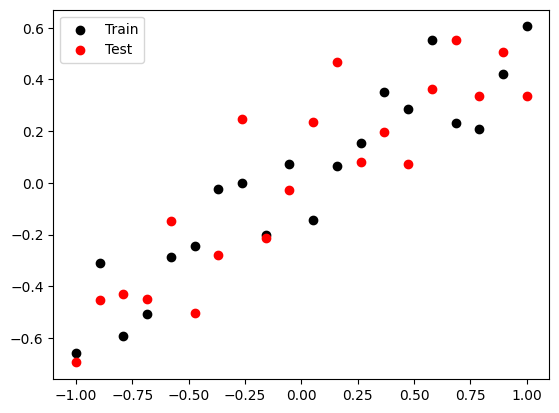

In [12]:
plt.scatter(X_train, y_train,c="black", label="Train")
plt.scatter(X_test, y_test,c="red", label="Test")
plt.legend()
plt.show()

In [17]:
model=Sequential()
model.add(Dense(128,activation='relu', input_dim=1))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))

In [18]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
adam=keras.optimizers.Adam(learning_rate=0.01)

In [23]:
model.compile(loss='mse', optimizer=adam,metrics=['mse'])

In [24]:
history=model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=500,verbose=0)

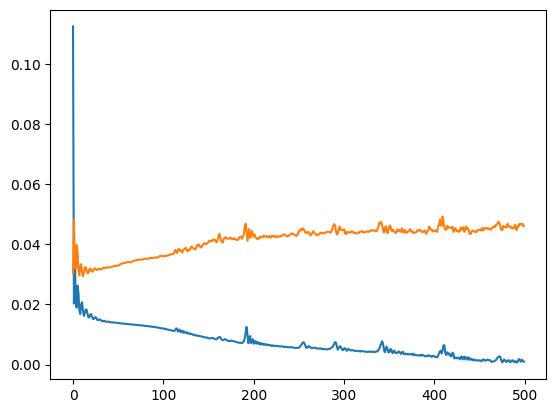

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**Evaluate Model Performaence**

In [27]:
_, train_mse=model.evaluate(X_train, y_train,verbose=0)
_, test_mse=model.evaluate(X_test, y_test,verbose=0)

In [29]:
print("Train Losst ={}".format(train_mse))
print("Test Losst ={}".format(test_mse))

Train Losst =0.0013568245340138674
Test Losst =0.04611257091164589


In [30]:
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


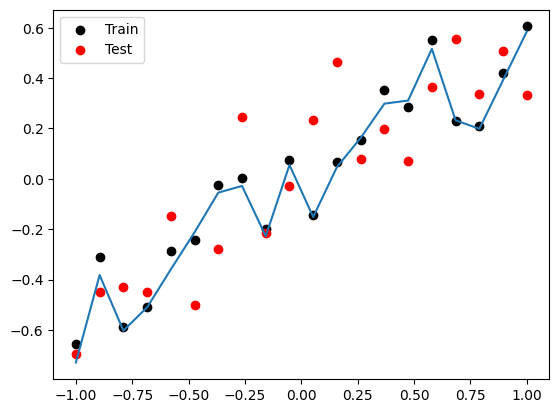

In [31]:
plt.scatter(X_train, y_train,c="black", label="Train")
plt.scatter(X_test, y_test,c="red", label="Test")
plt.plot(X_test,y_pred)
plt.legend()
plt.show()

**DropOut**

In [40]:
model=Sequential()
model.add(Dense(128,activation='relu', input_dim=1))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

In [41]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
adam=keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam,metrics=['mse'])

In [43]:
history=model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=500,verbose=0)

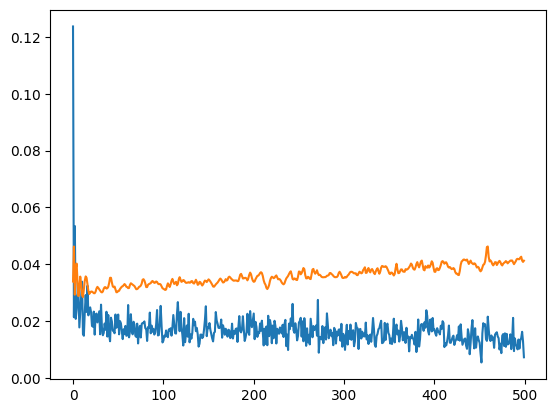

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [45]:
_, train_mse=model.evaluate(X_train, y_train,verbose=0)
_, test_mse=model.evaluate(X_test, y_test,verbose=0)

In [46]:
print("Train Losst ={}".format(train_mse))
print("Test Losst ={}".format(test_mse))

Train Losst =0.010253284126520157
Test Losst =0.04126463085412979


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


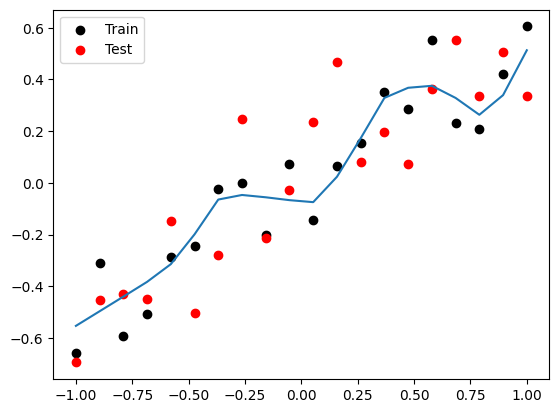

In [48]:
y_pred=model.predict(X_test)
plt.scatter(X_train, y_train,c="black", label="Train")
plt.scatter(X_test, y_test,c="red", label="Test")
plt.plot(X_test,y_pred)
plt.legend()
plt.show()